In this notebook, we will build and train a special type of neural network, called "convolutional neural network" (CNN). If you don't know what a neural network is yet, we suggest you to watch this video first to gain a basic understanding: https://www.youtube.com/watch?v=aircAruvnKk 

# 1. Import packages

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist # the dataset which we will be using is included as a sample dataset in the keras library
#from tensorflow.keras import datasets, layers, models

# 2. Load MNIST data and split into train and test set

The MNIST dataset contains handwritten digits (0 to 9) and is commonly used for training various image processing systems. The MNIST database contains 60,000 training images and 10,000 testing images. Find more information at http://yann.lecun.com/exdb/mnist/ or https://en.wikipedia.org/wiki/MNIST_database 
https://en.wikipedia.org/wiki/MNIST_database

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### 2.1 Let's take a look at some digits

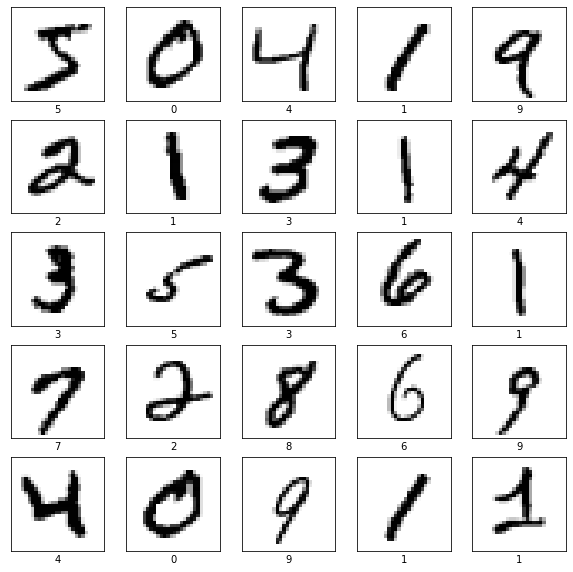

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


 
# 3. Preprocess input data

In [0]:
# We have to reshape the data so we can feed it into our neural network in the format that Keras needs.
# 28x28 is the size of our images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # we want all values to be between 0 and 1 (not 0 and 255 as before)
X_test /= 255
 
# Preprocess class label
Y_train = to_categorical(y_train, 10) # converts a class vector to binary class matrix (see next cells) 
# See https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical 
Y_test = to_categorical(y_test, 10)
 

In [0]:
# Let's take a look at what the X_train data now looks like
X_train.shape

(60000, 28, 28, 1)

In [0]:
y_train  # This is the original y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
Y_train  # This is after the transformation (to_categorical)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 4. Define the model

As input, a CNN takes tensors of shape (image_height, image_width, color_channels). Color_channels refers to (R,G,B). In this example, we will configure our CNN to process inputs of shape (28, 28, 1), which is the format of the greyscale MNIST images. First, we will add the convolutional layers:

In [0]:
model = Sequential()
 
model.add(Convolution2D(32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(Convolution2D(32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


Now we will add a dropout layer. Using “dropout”, you randomly deactivate certain neurons in a layer. Thus, the neural network won’t be able to rely on particular activations and can become more robust. More info: https://sebastianraschka.com/faq/docs/dropout.html and https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/


In [0]:
model.add(Dropout(0.25))

Dense layers take vectors as input (which are 1D), while the output of the first layers is 3D. Therefore, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. MNIST has 10 output classes, so we use a final Dense layer with 10 outputs and a softmax activation. (Softmax transforms the output so that it can be interpreted as probabilities, more info on softmax: https://en.wikipedia.org/wiki/Softmax_function)

In [0]:
# EXERCISE try to improve the model :-)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

This is a summary of all layers of our model:

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

# 5. Compile model

Compiling basically means defining the loss function, the optimizer and the metrics of our model. These options depend on the problem you are trying to solve, you can find the best techniques reading the literature in the field. For a classification task categorical cross-entropy as loss function usually works very well. 

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

 
# 6. Fit model on training data

In [0]:
history = model.fit(X_train, Y_train, 
          batch_size=32, epochs=1, verbose=1)

Train on 60000 samples
60000/60000 [==============================] - 41s 690us/sample - loss: 0.2462 - accuracy: 0.9245


 
# 7. Evaluate model on test data



In [0]:
test_predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score) 

[0.06854339779503643, 0.9782]


In [0]:
from sklearn.metrics import confusion_matrix # see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))

In [0]:
confusion # here we can see how often each digit was misclassified

array([[ 971,    0,    3,    0,    0,    0,    3,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    0,    3,    0,    2,    0],
       [   2,    4, 1014,    0,    3,    0,    1,    6,    2,    0],
       [   0,    0,    4,  991,    0,    4,    0,    6,    3,    2],
       [   1,    0,    5,    0,  968,    0,    0,    0,    2,    6],
       [   2,    0,    0,   12,    0,  868,    6,    0,    4,    0],
       [   5,    3,    0,    0,    3,    2,  942,    0,    3,    0],
       [   1,    5,   18,    1,    1,    0,    0,  988,    1,   13],
       [   9,    0,    5,    3,    3,    3,    0,    5,  939,    7],
       [   7,    6,    1,    4,    6,    3,    0,    4,    3,  975]])

# 8 Further resources


* https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2
* https://www.youtube.com/watch?v=YRhxdVk_sIs
* https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/
* https://deeplizard.com/learn/video/RznKVRTFkBY
*   https://www.tensorflow.org/tutorials/images/cnn
*   https://elitedatascience.com/keras-tutorial-deep-learning-in-python
* https://www.edureka.co/blog/convolutional-neural-network/ 




